In [277]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install wordcloud

     |████████████████████████████████| 366 kB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import ast

In [100]:
import seaborn as sns

In [128]:
import unicodedata
from nltk.corpus import stopwords# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']
import matplotlib.pyplot as plt

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [278]:
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from sklearn.svm import SVC
from NLP_Models import modelling as mdg

In [4]:
from NLP_Models import TextMining as tm

In [5]:
from NLP_Models import CleanText as ct

In [6]:
from NLP_Models import modelling as mdg

In [172]:
from NLP_Models import model_prediction as mo

# 1. Pelabelan Data HateSpeech dan Data nonHateSpeech

DATA HateSpeech

In [195]:
dh = pd.read_json('/home/fani/Documents/NLP/NLP_Models/data/tugas/hateiniya.json', lines = True)

In [197]:
dh.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [135]:
dh = dh[['created_at', 'date', 'time', \
             'user_id', 'username', 'name',\
                 'tweet','mentions', 'urls', 'photos', 'replies_count', \
                     'retweets_count', 'likes_count', 'hashtags',\
                         'link', 'retweet', 'quote_url',\
                             'near', 'geo', 'source', 'user_rt_id', 'user_rt',\
                                 'retweet_id', 'reply_to', 'retweet_date']]

In [136]:
dh['Label'] = 'hatespeech'

In [137]:
dh

,created_at,date,time,user_id,username,name,tweet,mentions,urls,photos,...,quote_url,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,Label
0,2021-06-23 10:13:51+07:00,2021-06-23,10:13:51,1397184434546294787,nyiroro85864405,NYI RORO KIDUL,@detikcom Jokowi dan semuanya Mentri nya GOBLO...,[],[],[],...,,,,,,,,"[{'screen_name': 'detikcom', 'name': 'detikcom...",,hatespeech
1,2021-06-23 07:44:42+07:00,2021-06-23,07:44:42,2382425420,liedetectorid,Saya,@kurawa Ini Mentri ngomongnya super perlu dila...,[],[],[],...,,,,,,,,"[{'screen_name': 'kurawa', 'name': 'Rudi Valin...",,hatespeech
2,2021-06-23 06:23:38+07:00,2021-06-23,06:23:38,1323517132236234752,baretanovri,One man one ojol,@hipohan Sekelas Mentri goblok..ikut2an bos Ny...,[],[],[],...,,,,,,,,"[{'screen_name': 'hipohan', 'name': 'Lukman Si...",,hatespeech
3,2021-06-22 15:04:50+07:00,2021-06-22,15:04:50,1253285946700599296,anakgem59239218,anakgembel,@kompascom Ini sekelas mentri omongannya di ba...,[],[],[],...,,,,,,,,"[{'screen_name': 'kompascom', 'name': 'Kompas....",,hatespeech
4,2021-06-22 12:47:35+07:00,2021-06-22,12:47:35,1293336101298376705,didaun1,H_A,Cerita di negri wakanda yang dipimpin pemimpin...,[],[],[],...,,,,,,,,[],,hatespeech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,2009-10-17 05:25:51+07:00,2009-10-17,05:25:51,78577974,zkzainal,zulkifli zainal,nunggu telp dr SBY..sapa tau dipilih jadi ment...,[],[],[],...,,,,,,,,[],,hatespeech
5769,2009-09-30 14:08:17+07:00,2009-09-30,14:08:17,59755831,cellinemeliana_,C,Goblok haha RT @cyntiamiranti: Karna ada mentr...,"[{'screen_name': 'cyntiamiranti', 'name': 'cyn...",[],[],...,,,,,,,,[],,hatespeech
5770,2009-09-28 22:59:46+07:00,2009-09-28,22:59:46,74772311,praadittyaa,Adit,"Adanya mantri sunat chan,hahaRT @ichanpamungka...","[{'screen_name': 'ichanpamungkas', 'name': 'ic...",[],[],...,,,,,,,,[],,hatespeech
5771,2009-09-28 22:56:26+07:00,2009-09-28,22:56:26,67621133,ichanpamungkas,Ichsan P,jadi mantri suntik aja dah kem RT @agusritonga...,"[{'screen_name': 'agusritonga', 'name': 'agus ...",[],[],...,,,,,,,,[],,hatespeech


DATA nonHateSpeech

In [138]:
dnh = pd.read_json('/home/fani/Documents/NLP/NLP_Models/data/tugas/bukanhate.json', lines = True)

In [139]:
dnh.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [140]:
dnh = dnh[['created_at', 'date', 'time', \
             'user_id', 'username', 'name',\
                 'tweet','mentions', 'urls', 'photos', 'replies_count', \
                     'retweets_count', 'likes_count', 'hashtags',\
                         'link', 'retweet', 'quote_url',\
                             'near', 'geo', 'source', 'user_rt_id', 'user_rt',\
                                 'retweet_id', 'reply_to', 'retweet_date']]

In [141]:
dnh['Label'] = 'nonhatespeech'

In [142]:
dnh

,created_at,date,time,user_id,username,name,tweet,mentions,urls,photos,...,quote_url,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,Label
0,2021-06-21 19:45:09+07:00,2021-06-21,19:45:09,39677695,gnfi,Good News From Indonesia,ALE Education Day 2021: Hybrid Learning System...,[],[https://attendee.gotowebinar.com/register/467...,[https://pbs.twimg.com/media/E4aDWYaXIAMV1I3.jpg],...,,,,,,,,[],,nonhatespeech
1,2021-06-21 18:48:24+07:00,2021-06-21,18:48:24,39677695,gnfi,Good News From Indonesia,"Yuk yg mau tahu tembakau asal Temanggung ini, ...",[],[https://www.goodnewsfromindonesia.id/2021/06/...,[],...,,,,,,,,[],,nonhatespeech
2,2021-06-21 18:47:46+07:00,2021-06-21,18:47:46,39677695,gnfi,Good News From Indonesia,"Kemudian, tembakau ini sering digunakan sebaga...",[],[],[],...,,,,,,,,[],,nonhatespeech
3,2021-06-21 18:47:36+07:00,2021-06-21,18:47:36,39677695,gnfi,Good News From Indonesia,"Bagaikan lauk pada sepiring nasi, tembakau sri...",[],[],[],...,,,,,,,,[],,nonhatespeech
4,2021-06-21 18:47:23+07:00,2021-06-21,18:47:23,39677695,gnfi,Good News From Indonesia,Tembakau dari Temanggung dikenal dengan kualit...,[],[],[],...,,,,,,,,[],,nonhatespeech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-12-22 08:00:57+07:00,2020-12-22,08:00:57,39677695,gnfi,Good News From Indonesia,Pemerintah pusat mendorong daerah menjadikan p...,[],[https://www.goodnewsfromindonesia.id/2020/11/...,[],...,,,,,,,,[],,nonhatespeech
4996,2020-12-22 07:01:11+07:00,2020-12-22,07:01:11,39677695,gnfi,Good News From Indonesia,Kopi Solok digemari karena punya karakter yang...,[],[https://www.goodnewsfromindonesia.id/2020/11/...,[],...,,,,,,,,[],,nonhatespeech
4997,2020-12-22 06:00:59+07:00,2020-12-22,06:00:59,39677695,gnfi,Good News From Indonesia,Meski banyak yang menyebut Tabebuya sebagai Bu...,[],[https://www.goodnewsfromindonesia.id/2020/11/...,[],...,,,,,,,,[],,nonhatespeech
4998,2020-12-22 05:01:04+07:00,2020-12-22,05:01:04,39677695,gnfi,Good News From Indonesia,"Berbicara soal film Indonesia, memang tak bisa...",[],[https://www.goodnewsfromindonesia.id/infograp...,[],...,,,,,,,,[],,nonhatespeech


Menggabungkan data hateSpeech dengan nonHateSpeech

In [192]:
data = pd.concat([dnh, dh])

In [145]:
data = data.reset_index(drop= True) 

In [207]:
data.rename(columns={'tweet':'text'}, inplace=True)

Cleaning Data

In [ ]:
data = ct.cleanningtext(data = data, both = True, onlyclean = False, sentiment = False)

In [ ]:
data.to_json('./NLP_Models/data/Kel4dataFinalCleanttext.json', orient='records')

# 2. Menghitung banyaknya masing-masing label kategori dalam dataset yang ditampilkan dalam bentuk dataframe

In [258]:
data = pd.read_json('/home/fani/Documents/NLP/NLP_Models/data/Kel4dataFinalCleanttext.json')

In [259]:
data1 = data[['text', 'cleaned_text','Label']]

In [261]:
data[:10]

,created_at,date,time,user_id,username,name,text,mentions,urls,photos,...,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,Label,cleaned_text
0,2021-06-21 12:45:09,2021-06-21,19:45:09,39677695,gnfi,Good News From Indonesia,ale education day 2021: hybrid learning system...,[],[https://attendee.gotowebinar.com/register/467...,[https://pbs.twimg.com/media/E4aDWYaXIAMV1I3.jpg],...,,,,,,,[],,nonhatespeech,ale education day hybrid learning system adapt...
1,2021-06-21 11:48:24,2021-06-21,18:48:24,39677695,gnfi,Good News From Indonesia,"yuk yg mau tahu tembakau asal temanggung ini, ...",[],[https://www.goodnewsfromindonesia.id/2021/06/...,[],...,,,,,,,[],,nonhatespeech,yuk tembakau temanggung klik artikelnya
2,2021-06-21 11:47:46,2021-06-21,18:47:46,39677695,gnfi,Good News From Indonesia,"kemudian, tembakau ini sering digunakan sebaga...",[],[],[],...,,,,,,,[],,nonhatespeech,tembakau bahan racik bland komposisi tembakau ...
3,2021-06-21 11:47:36,2021-06-21,18:47:36,39677695,gnfi,Good News From Indonesia,"bagaikan lauk pada sepiring nasi, tembakau sri...",[],[],[],...,,,,,,,[],,nonhatespeech,lauk sepiring nasi tembakau srinthil dikenal t...
4,2021-06-21 11:47:23,2021-06-21,18:47:23,39677695,gnfi,Good News From Indonesia,tembakau dari temanggung dikenal dengan kualit...,[],[],[],...,,,,,,,[],,nonhatespeech,tembakau temanggung dikenal kualitas nilai eko...
5,2021-06-21 11:47:00,2021-06-21,18:47:00,39677695,gnfi,Good News From Indonesia,pada dataran tinggi berhawa sejuk inilah terha...,[],[],[],...,,,,,,,[],,nonhatespeech,datar hawa sejuk hampar ladang tembakau tanam ...
6,2021-06-21 11:46:44,2021-06-21,18:46:44,39677695,gnfi,Good News From Indonesia,area tembakau tersebar berada di 15 kecamatan....,[],[],[],...,,,,,,,[],,nonhatespeech,area tembakau sebar camat camat bentang kaki l...
7,2021-06-21 11:46:24,2021-06-21,18:46:24,39677695,gnfi,Good News From Indonesia,kabupaten temanggung terletak persis di tengah...,[],[],[],...,,,,,,,[],,nonhatespeech,kabupaten temanggung letak persis pulau jawa t...
8,2021-06-21 11:46:01,2021-06-21,18:46:01,39677695,gnfi,Good News From Indonesia,"pasalnya, srinthil bagi mereka adalah suatu ‘p...",[],[],[],...,,,,,,,[],,nonhatespeech,pasalnya srinthil pulung ndaru rigen makna ist...
9,2021-06-21 11:45:42,2021-06-21,18:45:42,39677695,gnfi,Good News From Indonesia,"berdasarkan cerita yang beredar, daun tembakau...",[],[],[],...,,,,,,,[],,nonhatespeech,dasar cerita edar daun tembakau srinthil ditan...


In [151]:
data1.groupby('Label').count().transpose()

Label,hatespeech,nonhatespeech
text,5772,5000
cleaned_text,5772,5000


# 3. Analisis Data Eksploratif

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 0 to 10772
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      10772 non-null  datetime64[ns]
 1   date            10772 non-null  datetime64[ns]
 2   time            10772 non-null  object        
 3   user_id         10772 non-null  int64         
 4   username        10772 non-null  object        
 5   name            10772 non-null  object        
 6   text            10772 non-null  object        
 7   mentions        10772 non-null  object        
 8   urls            10772 non-null  object        
 9   photos          10772 non-null  object        
 10  replies_count   10772 non-null  int64         
 11  retweets_count  10772 non-null  int64         
 12  likes_count     10772 non-null  int64         
 13  hashtags        10772 non-null  object        
 14  link            10772 non-null  object        
 15  re

In [17]:
np.sum(data.isnull().any(axis=1)) #noise

0

In [274]:
data.describe()

,user_id,replies_count,retweets_count,likes_count
count,1.077200e+04,10772.000000,10772.000000,10772.000000
mean,2.059561e+17,0.875511,5.965930,15.773580
std,4.246376e+17,5.899162,64.766673,202.230283
min,6.400032e+06,0.000000,0.000000,0.000000
25%,3.967770e+07,0.000000,0.000000,0.000000
50%,6.141574e+07,0.000000,0.000000,1.000000
75%,1.922200e+09,1.000000,3.000000,8.000000
max,1.400696e+18,366.000000,3721.000000,12990.000000


Retweet terbanyak

In [265]:
df = data[['retweets_count','text']]

In [266]:
df.loc[df['retweets_count'].idxmax()]

retweets_count                                                 3721
text              from @info_etam - seekor orang utan dewasa men...
Name: 535, dtype: object

Like terbanyak

In [262]:
like = data[['likes_count','text']]

In [264]:
like.loc[like['likes_count'].idxmax()]

likes_count                                                12990
text           selamat pagi indonesia..  pagi yang indah dan ...
Name: 3720, dtype: object

Reply terbanyak

In [271]:
reply = data[['replies_count','text']]

In [272]:
reply.loc[reply['replies_count'].idxmax()]

replies_count                                                  366
text             from @info_etam - seekor orang utan dewasa men...
Name: 535, dtype: object

Data Label

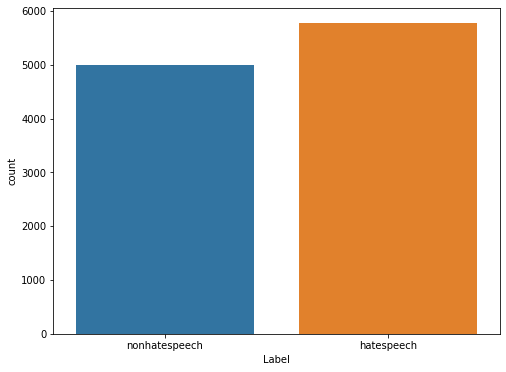

In [273]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="Label", data=data1)

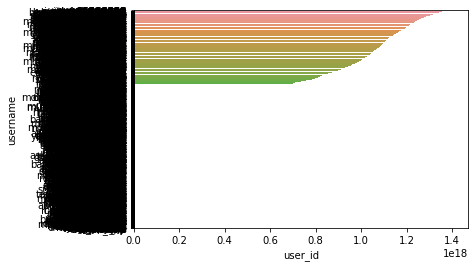

In [279]:
data = data.loc[:,['username','user_id']]
data.sort_values(by='user_id',ascending=False,inplace=True)
data.drop_duplicates(subset='username',keep='first',inplace=True)
count = pd.DataFrame()
count = data.iloc[:20,:]
sns.barplot(x=data.user_id,y=data.username)
plt.show()

# Unigram

In [80]:
def unigram(data):
    text = " ".join(data)
    CleanedText = re.sub(r'[^a-zA-Z]'," ",text)
    CleanedText = " ".join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(CleanedText) if word not in stopwords.words("indonesian") and len(word) > 3])
    return CleanedText

In [87]:
def ngrams(data,n):
    text = " ".join(data)
    text1 = text.lower()
    text2 = re.sub(r'[^a-zA-Z]'," ",text1)
    text3 = " ".join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(text2) if word not in stopwords.words("english") and len(word) > 2])
    words = nltk.word_tokenize(text3)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [161]:
(pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]

(mentri,)                5680
(goblok,)                5532
(indonesia,)             2179
(makintahuindonesia,)    1951
(yg,)                    1937
(rt,)                     913
(yuk,)                    866
(simak,)                  754
(ya,)                     730
(aja,)                    724
dtype: int64

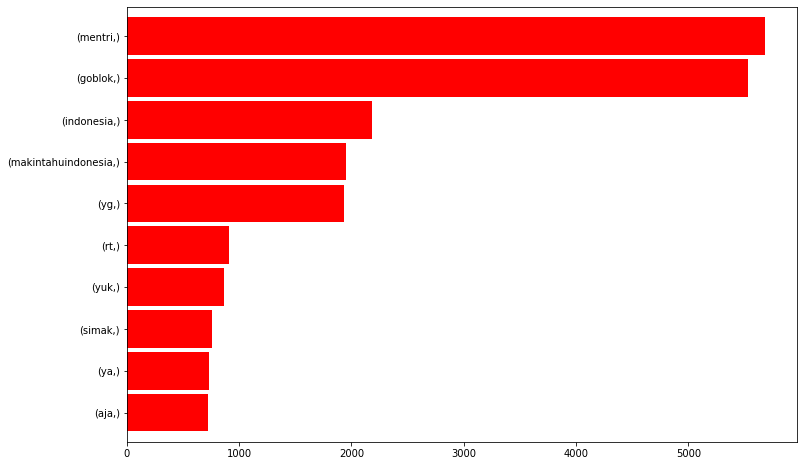

In [164]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]
unigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))

In [81]:
CleanedText = unigram(data['text'])

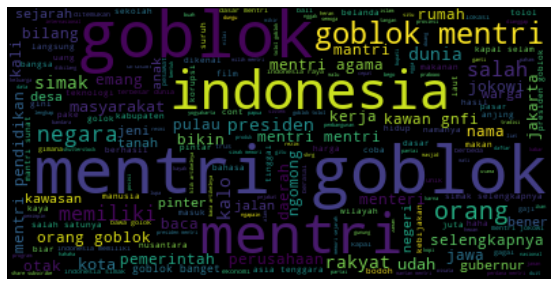

In [86]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
wordcloud = WordCloud(random_state=21).generate(CleanedText)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Bigram

In [92]:
Bigram_Freq = nltk.FreqDist(ngram)

In [154]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(mentri, goblok)                      1450
(yuk, makintahuindonesia)              394
(goblok, mentri)                       352
(simak, yuk)                           302
(selengkapnya, makintahuindonesia)     297
(yg, goblok)                           269
(jd, mentri)                           247
(mentri, yg)                           206
(yuk, simak)                           195
(kawan, gnfi)                          182
dtype: int64

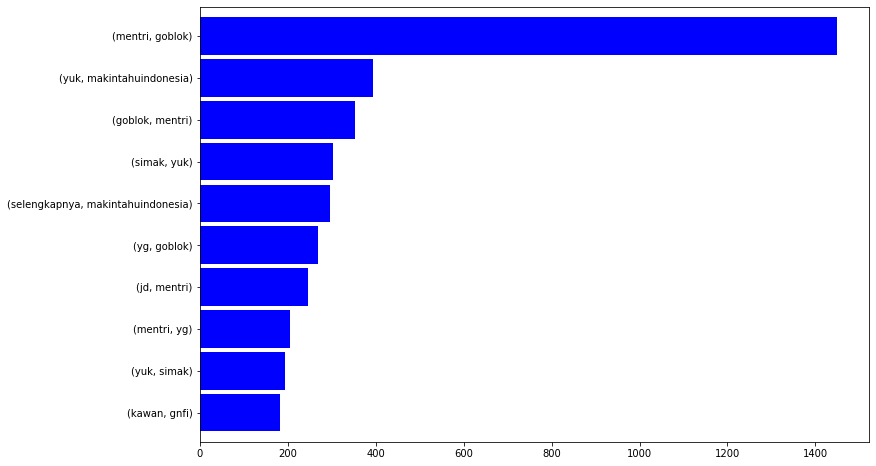

In [165]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

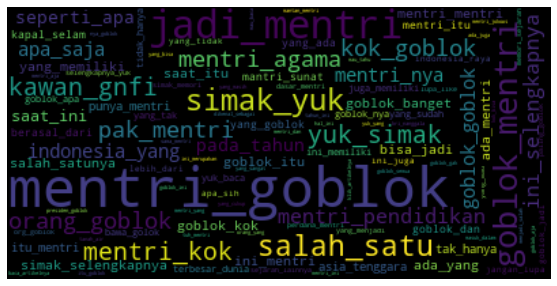

In [93]:
bigram_wordcloud = WordCloud(random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (10,5))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Trigram

In [96]:
Trigram_Freq = nltk.FreqDist(ngram)

In [158]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(simak, yuk, makintahuindonesia)                     284
(mentri, goblok, rt)                                  76
(simak, selengkapnya, makintahuindonesia)             66
(sejarah, httpstco1ajzryv5i7, makintahuindonesia)     60
(yuk, simak, makintahuindonesia)                      60
(memori, sejarah, httpstco1ajzryv5i7)                 57
(simak, memori, sejarah)                              57
(yuk, baca, artikelnya)                               55
(yuk, simak, memori)                                  54
(mentri, yg, goblok)                                  51
dtype: int64

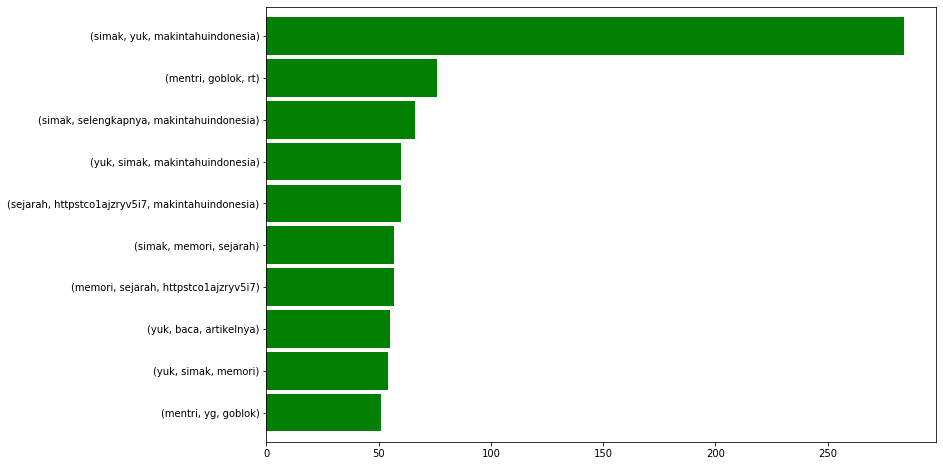

In [166]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))

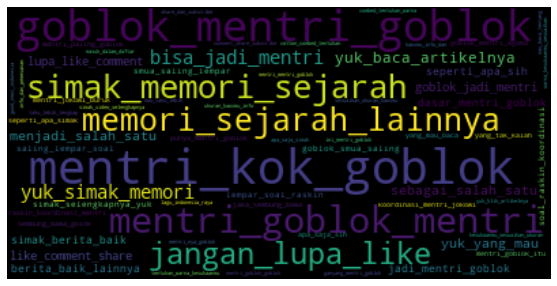

In [159]:
trigram_wordcloud = WordCloud(random_state = 21).generate_from_frequencies(Trigram_Freq)
plt.figure(figsize = (10,5))
plt.imshow(trigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# 4. Vektorisasi menggunakan teori TF dan TFIDF

# Teori TF

TF adalah Term Frequency t,dengan f(t,d) adalah pencacahan mentah istilah dalam dokumen, yaitu jumlah kemunculan istilah t dalam dokumen d. Semakin sering suatu istilah muncul, semakin besar nilai tf-nya.

In [14]:
dataFinal = data[['text', 'cleaned_text','Label']]
modelSVC = mdg.modelling(data = dataFinal, modelname= '202106',\
                         crossval = False,  termfrequency = True, \
                             n_fold = 3, kernel = 'linear', n_jobs=1)

/home/fani/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.4s finished


roc_auc model terbaik adalah: 0.99988032965077
roc_auc model estimator terbaik adalah: 0.9953596287703016
Parameter terbaik adalah: {'svc__C': 0.01}
Rataan roc_auc model tiap fold adalah: 0.9998024575069998


# TFIDF

Inversi frekuensi dokumen, idf(t, D), adalah ukuran informasi yang diberikan oleh istilah t, yaitu seberapa sering atau jarang sebuah istilah muncul dalam seluruh dokumen. Semakin jarang suatu istilah di antara dokumen, semakin besar nilai idf-nya. Nilainya adalah logaritma dari kebalikan dari jumlah dokumen yang memiliki istilah t yang dibagi jumlah seluruh dokumen (N), dengan himpunan {d ∈ D: t ∈ d} adalah himpunan dokumen d dalam D yang memiliki istilah t. 

In [15]:
dataFinal = data[['text', 'cleaned_text','Label']]
modelSVC = mdg.modelling(data = dataFinal, modelname= '202106',\
                         crossval = False,  termfrequency = False, \
                             n_fold = 3, kernel = 'linear', n_jobs=1)

/home/fani/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.9min finished


roc_auc model terbaik adalah: 0.9998816257195341
roc_auc model estimator terbaik adalah: 0.9958236658932714
Parameter terbaik adalah: {'svc__C': 0.1}
Rataan roc_auc model tiap fold adalah: 0.9997992133693031


# Analisis hasil evaluasi

Berdasarkan kedua evaluasi, terlihat bahwa hasil modellingnya berbeda. Parameter C pada teori TF kurang bagus dibanding pada teori TFIDF. Terlihat juga pada hasil lainnya bahwa dengan menggunakan teori TF menghasilkan hasil yang sedikit berbeda dengan teori TFIDF. Hal ini dapat dikatakan jika hasil modelling akan mendapat hasil yang bagus jika menggunakan teori TFIDF.

# 5. Support Vector Machine (Hard Marging & Soft Margin)

SVM adalah sistem pembelajaran menggunakan ruang berupa fungsi – fungsi linear dalam sebuah ruang fitur yang berdimensi tinggi yang dilatih menggunakan algoritma pembelajaran berdasarkan pada teori optimasi dengan mengimplementasikan learning bias (Santosa, 2007). SVM memiliki prinsip dasar linier classifier yaitu kasus klasifikasi yang secara linier dapat dipisahkan, namun SVM telah dikembangkan agar dapat bekerja pada problem non-linier dengan memasukkan konsep kernel pada ruang kerja berdimensi tinggi (Pusphita Anna Octaviani, dkk, 2014).

   Support Vector Machine (SVM) menggunakan model linear sebagai decision boundary dengan bentuk umum sbb: 
                     
                     y(x) = wTf(x) + b

dimana x adalah vektor input, w adalah parameter bobot,
f(x) adalah fungsi basis, dan b adalah suatu bias.

Bentuk model linear yang paling sederhana untuk decision boundary adalah:
                       
                     y(x) = wTx + w0
                       
Dimana x adalah vektor input, w adalah vektor bobot dan w0 adalah bias.

   Decision boundary adalah ketika y(x)=0, yaitu suatu hyperplane berdimensi (D-1). Untuk menentukan decision boundary (DB), yaitu suatu model linear atau hyperplane y(x) dengan parameter w dan b, SVM menggunakan konsep margin yang didefiniskan sebagai jarak terdekat antara DB dengan sembarang data training. Dengan memaksimalkan margin maka akan di dapat suatu DB tertentu.

   Margin merupakan jarak antara hyperplane dengan data terdekat dari masing – masing kelas. SVM akan mencari hyperplane terbaik yang berfungsi sebagai pemisah dua buah kelas pada ruang input. Hyperplane tersebut dapat berupa line pada two dimension dan dapat berupa flat plane pada multiple plane. 

   Hard – Margin SVM / Linear SVM yaitu Teknik SVM dimana merupakan klasifier yang menemukan hyperplane dengan kasus data yang digunakan merupakan data dengan dua kelas yang sudah terpisah secara linear. Margin maksimum dapat diperoleh dengan cara memaksimalkan nilai jarak antara hyperplane dan titik terdekatnya yaitu 1/||w||.
    
   Soft – Margin SVM Ketika data yang digunakan tidak sepenuhnya dapat dipisahkan, slack variables xi diperkenalkan kedalam fungsi obyektif SVM untuk memungkinkan kesalahan dalam misklasifikasi. Dalam hal ini, SVM bukan lagi hard margin classifier yang akan mengklasifikasi semua data dengan sempurna melainkan sebaliknya yaitu SVM soft margin classifier dengan mengklasifikasikan sebagian besar data dengan benar, sementara memungkinkan model untuk membuat misklasifikasi beberapa titik di sekitar batas pemisah.
    
   Persamaan soft margin hampir mirip dengan hard margin hanya terdapat sedikit modifikasi dengan adanya slack variabel

In [120]:
modelSVC = mdg.modelling(data = dataFinal, modelname= '202106',\
                         crossval = False,  termfrequency = False, \
                             n_fold = 3, kernel = 'linear', n_jobs=1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.5min finished


roc_auc model terbaik adalah: 0.9998816257195341
roc_auc model estimator terbaik adalah: 0.9958236658932714
Parameter terbaik adalah: {'svc__C': 0.1}
Rataan roc_auc model tiap fold adalah: 0.9997992133693031


# 6. Model Prediksi

In [170]:
teks1 = 'Haha biang bangsat! Cebong lu!'

In [173]:
mo.hateSpeechPredict(teks1)

{'model_pred': {'hate': 57.693332390286656, 'nonhate': 42.306667609713344},
 'final_result': 'hate',
 'confidence': 57.693}

In [174]:
teks2 = ' Si bangsat cebong penyebar hoax ternyata anak banteng'

In [175]:
mo.hateSpeechPredict(teks2)

{'model_pred': {'hate': 79.3722767447101, 'nonhate': 20.627723255289894},
 'final_result': 'hate',
 'confidence': 79.372}

In [176]:
teks3 = 'Flu babi muncul di Cina, dan flu burung menyebar dr Cina ke dunia,sekarang virus korona telah muncul d Cina Masyarakat Cina adalah masyarakat yg korup secara mental. Kt harus menyelamatkan anak2 Tiongkok telah menjadi ancaman bagi kemanusiaan.#Corono'

In [177]:
mo.hateSpeechPredict(teks3)

{'model_pred': {'hate': 3.330335173686501, 'nonhate': 96.66966482631348},
 'final_result': 'nonhate',
 'confidence': 96.67}

In [178]:
teks4 = 'Bangsat cina. I said what i said. Fuck you sepet'

In [179]:
mo.hateSpeechPredict(teks4)

{'model_pred': {'hate': 62.05792954630266, 'nonhate': 37.94207045369734},
 'final_result': 'hate',
 'confidence': 62.058}

In [180]:
teks5 = 'Dasar komunis bangsat, cina bangsat, gara2 itu laga Arsenal vs city jg nngak di siarin di negerinya segitu bencinya sama Ozil yg mengucapkan rasa simpatinya..'

In [181]:
mo.hateSpeechPredict(teks5)

{'model_pred': {'hate': 81.17409826692345, 'nonhate': 18.825901733076538},
 'final_result': 'hate',
 'confidence': 81.174}

In [182]:
teks6 = 'WOI blantik ASU jelasin sejarah Cina setau saya bangsat cina yang menggarong di Indonesia #JanganPercayaBoneka #JanganPercayaBoneka'

In [183]:
mo.hateSpeechPredict(teks6)

{'model_pred': {'hate': 34.52225245243548, 'nonhate': 65.47774754756452},
 'final_result': 'nonhate',
 'confidence': 65.478}

In [184]:
teks7 = 'D manakah bangsat cina yg mmpjuangkan hak sama rata ketika ini? Maaf bukan aku rasis tp ini juga knyataan...oh ya,bukit kepong jgn lupa'

In [185]:
mo.hateSpeechPredict(teks7)

{'model_pred': {'hate': 65.51516527388817, 'nonhate': 34.484834726111835},
 'final_result': 'hate',
 'confidence': 65.515}

In [186]:
teks8 = ' Cita-cita kok meniduri 100 perempuan. Cita-cita tuh melindungi segenap bangsa Indonesia dan seluruh tumpah darah Indonesia, memajukan kesejahteraan umum, mencerdaskan kehidupan bangsa, dan ikut melaksanakan ketertiban dunia yang berdasarkan kemerdekaan'

In [187]:
mo.hateSpeechPredict(teks8)

{'model_pred': {'hate': 0.0005151819139155498, 'nonhate': 99.99948481808609},
 'final_result': 'nonhate',
 'confidence': 99.999}

In [188]:
teks9 = 'Sejak proklamasi kemerdekaan, Pancasila ditetapkan sebagai ideologi bangsa Indonesia, sebagai pedoman hidup masyarakat Indonesia dalam ber.....https://facebook.com/103754998279685/posts/198032845518566/…'

In [189]:
mo.hateSpeechPredict(teks9)

{'model_pred': {'hate': 5.4391296311875076e-05, 'nonhate': 99.99994560870368},
 'final_result': 'nonhate',
 'confidence': 100.0}

In [190]:
teks10 = 'SAYA PRIHATIN SEKALI GENERASI PENERUS BANGSA INDONESIA SEPERTI INI AKIBAT PEMBELAJARAN TATAP MUKA ON LINE YA DI BATASI MIN SEMINGGU 2X DAN HANYA 2 JAM'

In [191]:
mo.hateSpeechPredict(teks10)

{'model_pred': {'hate': 0.7564709858506428, 'nonhate': 99.24352901414937},
 'final_result': 'nonhate',
 'confidence': 99.244}

# 7. Analisis Model

Model SVM yang digunakan mendapatkan hasil modelling yang cukup baik pada database ini. Hasil yang diperoleh adalah sebagai berikut :
1. roc_auc model terbaik adalah: 0.9998816257195341;
2. roc_auc model estimator terbaik adalah: 0.9958236658932714;
3. Parameter terbaik adalah: {'svc__C': 0.1};
4. Rataan roc_auc model tiap fold adalah: 0.9997992133693031

Untuk kelebihan dari model yang terbentuk adalah waktu prosesnya yang cepat pada database ini, dan menghasilkan nilai prediksi yang mendekati nilai awal, juga mudah untuk diimplementasikan hasilnya. Namun kekurangan pada model ini secara umum adalah sulit dipakai dalam problem berskala besar, dalam arti jika datanya banyak maka akan mendapat kesulitan dalam prosesnya, bisa dikarenakan waktu yang digunakan cukup memakan waktu.